In [82]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [83]:
# Finding distance between points
def dist(x1, y1, x2, y2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

In [84]:
def cluster(k, x, y, x_cc, y_cc):
    clust = []
    for i in range(0, n):
        min = dist(x[i], y[i], x_cc[0], y_cc[0])
        min_num = 0
        for j in range(1, k):
            if min > dist(x[i], y[i], x_cc[j], y_cc[j]):
                min = dist(x[i], y[i], x_cc[j], y_cc[j])
                min_num = j
        clust.append(min_num)
    return clust

In [85]:
def create_centers(x_axis,y_axis,clusters):
    x_cc = np.mean(x_axis)
    y_cc = np.mean(y_axis)
    R = max(dist(x_axis[i], y_axis[i], x_cc, y_cc) for i in range(n))
    x_c, y_c = [], []
    for i in range(clusters):
        x_c.append(R * np.cos(2 * np.pi * i / clusters) + x_cc)
        y_c.append(R * np.sin(2 * np.pi * i / clusters) + y_cc)
    return x_c, y_c

In [86]:
def recalc_centers(x, y, x_c, y_c, clust, k):
    for i in range(k):
        n = sum(el == i for el in clust)
        sum_x = sum(x[j] for j in range(len(clust)) if clust[j] == i)
        sum_y = sum(y[j] for j in range(len(clust)) if clust[j] == i)
        x_c[i] = sum_x / n if n != 0 else 0
        y_c[i] = sum_y / n if n != 0 else 0

In [87]:
def sq_sum(k, df, x_c, y_c):
    j = 0
    for c in range(k):
        for i in range(len(x)):
            if df['cluster'][i] == c:
                j += dist(df['x'][i], df['y'][i], x_c[c], y_c[c])**2
    return j

In [88]:
def kmeans(k, x, y, sh_grph=True):
    n = len(x)
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    df['cluster'] = [0] * n
    x_c, y_c = create_centers(df['x'], df['y'], k)
    while True:
        clusters = cluster(k, df['x'], df['y'], x_c, y_c)
        if np.array_equal(clusters, df['cluster']):
            if sh_grph: 
                
                if k > len(colors):
                    facet = sns.lmplot(data=df, x='x', y='y', hue='cluster', 
                   fit_reg=False, legend=True, legend_out=True)
                    plt.scatter(x_c, y_c, c='red', s=100, marker='*')
                else:
                    cl1 = []
                    for i in clusters:
                        cl1.append(colors[i])
                    plt.scatter(df['x'],df['y'], color=cl1)
                    plt.scatter(x_c, y_c, color=colors[:k], marker="*", s=100)
                    
                plt.show()
            break
        else:
            df['cluster'] = clusters
            recalc_centers(df['x'], df['y'], x_c, y_c, clusters, k)
    return df, x_c, y_c

In [89]:
def cluster_count(x, y, alpha):
    df, x_c, y_c = kmeans(1, x, y, False)
    j_pp = sq_sum(1, df, x_c, y_c)
    df, x_c, y_c = kmeans(2, x, y, False)
    j_p = sq_sum(2, df, x_c, y_c)
    for k in range(3, len(x)):
        df, x_c, y_c = kmeans(k, x, y, False)
        j = sq_sum(k, df, x_c, y_c)
        if np.abs((j_p - j)/(j_pp - j_p)) < alpha:
            kmeans(k - 1, x, y)
            return
        j_pp = j_p
        j_p = j

In [90]:
def recalc_clusters(x, y, alpha):
    df, x_c, y_c = kmeans(1,x,y,False)
    old_j = sq_sum(1, df, x_c, y_c)
    for k in range(2, 50):
        df, x_c, y_c = kmeans(k, x, y, False)
        j = sq_sum(k, df, x_c, y_c)
        if old_j - j <= alpha:
            kmeans(k, x, y)
            return
        old_j = j

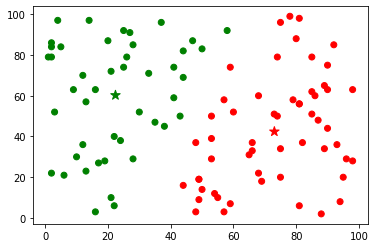

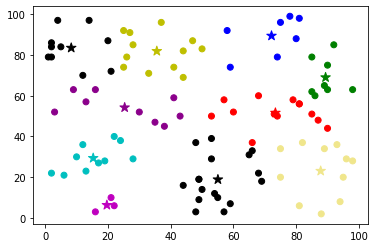

In [93]:
# Cluster colors
colors = ['r','g','blue','y','black','darkmagenta','c','m','k','khaki','teal']
n, k = 100, 4
x = np.random.randint(1, 100, n)
y = np.random.randint(1, 100, n)
op_count = cluster_count(x, y, 0.3)
op_count = recalc_clusters(x, y,0.9)